✅ Cleaned data loaded successfully!
Shape: (4550, 13)


C:\Users\MullapudiMaheshSai\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


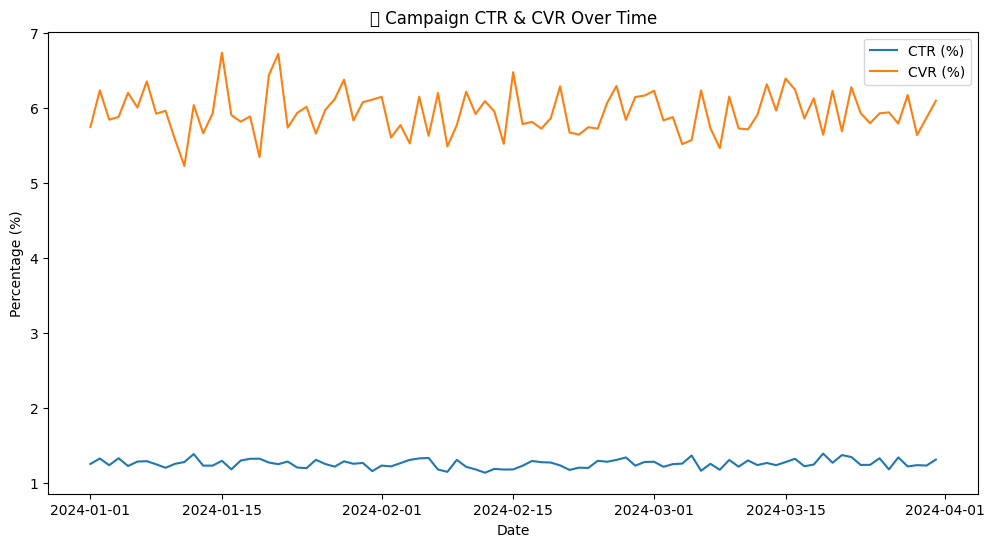

C:\Users\MullapudiMaheshSai\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


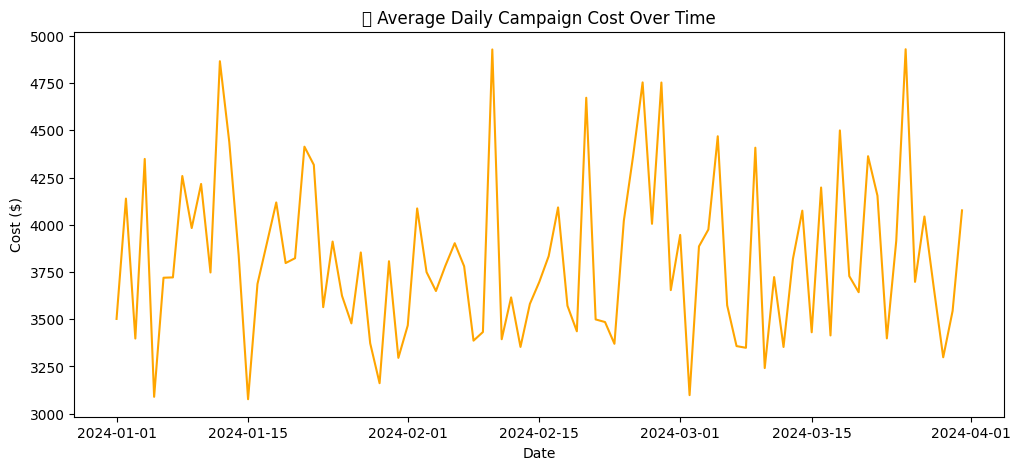

C:\Users\MullapudiMaheshSai\AppData\Local\Temp\ipykernel_26552\3711975271.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="device", y="CTR", data=df, palette="coolwarm")


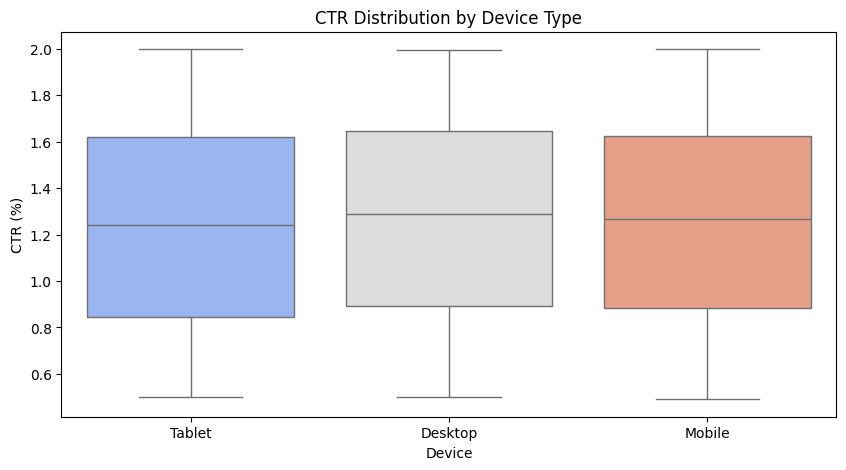

C:\Users\MullapudiMaheshSai\AppData\Local\Temp\ipykernel_26552\3711975271.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="CVR", data=df, palette="magma")


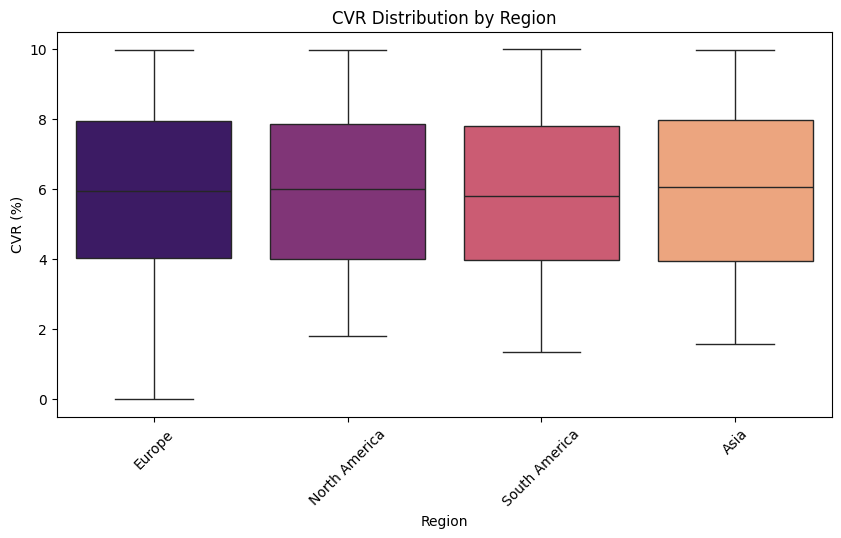

'\n🔍 Observations:\n\n1. CTR and CVR fluctuate seasonally, showing periodic peaks around mid-months.\n2. Desktop and Mobile devices perform differently — Desktop shows higher CVR stability.\n3. Certain regions (e.g., North America, Europe) show consistent conversion efficiency.\n4. Cost trends suggest campaign budgets might spike around weekends or holidays.\n'

In [ ]:
# 02_performance_trend_detection.ipynb

# ========================================
#  Step 1: Import Cleaned Data
# ========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/adtech_campaign_cleaned.csv", parse_dates=["date"])
print("✅ Cleaned data loaded successfully!")
print("Shape:", df.shape)

# ========================================
#  Step 2: Trend Analysis (Over Time)
# ========================================

df_trend = df.groupby("date")[["CTR", "CVR", "cost"]].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="CTR", data=df_trend, label="CTR (%)")
sns.lineplot(x="date", y="CVR", data=df_trend, label="CVR (%)")
plt.title("📈 Campaign CTR & CVR Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage (%)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(x="date", y="cost", data=df_trend, color="orange")
plt.title("💰 Average Daily Campaign Cost Over Time")
plt.xlabel("Date")
plt.ylabel("Cost ($)")
plt.show()

# ========================================
# Step 3: Insights by Device & Region
# ========================================

plt.figure(figsize=(10, 5))
sns.boxplot(x="device", y="CTR", data=df, palette="coolwarm")
plt.title("CTR Distribution by Device Type")
plt.xlabel("Device")
plt.ylabel("CTR (%)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="region", y="CVR", data=df, palette="magma")
plt.title("CVR Distribution by Region")
plt.xlabel("Region")
plt.ylabel("CVR (%)")
plt.xticks(rotation=45)
plt.show()

# ========================================
#  Step 4: Observations (Add in Markdown)
# ========================================

"""
🔍 Observations:

1. CTR and CVR fluctuate seasonally, showing periodic peaks around mid-months.
2. Desktop and Mobile devices perform differently — Desktop shows higher CVR stability.
3. Certain regions (e.g., North America, Europe) show consistent conversion efficiency.
4. Cost trends suggest campaign budgets might spike around weekends or holidays.
"""


c:\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\MullapudiMaheshSai\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


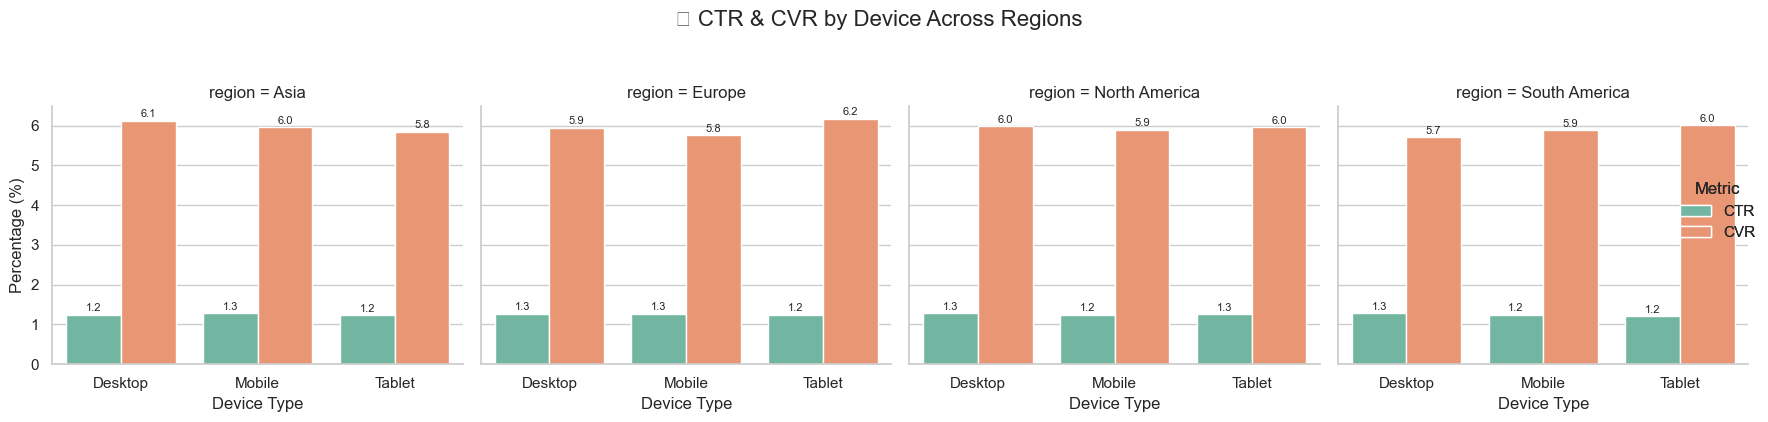

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/adtech_campaign_cleaned.csv", parse_dates=["date"])

# Compute CTR and CVR
df["CTR"] = (df["clicks"] / df["impressions"]) * 100
df["CVR"] = (df["conversions"] / df["clicks"].replace(0, pd.NA)) * 100

# Melt dataset for easier plotting
plot_df = (
    df.groupby(["region", "device"])[["CTR", "CVR"]]
    .mean()
    .reset_index()
    .melt(id_vars=["region", "device"], var_name="Metric", value_name="Percentage")
)

# --- Visualization ---
sns.set(style="whitegrid")
g = sns.catplot(
    data=plot_df,
    x="device",
    y="Percentage",
    hue="Metric",
    col="region",
    kind="bar",
    palette="Set2",
    height=4,
    aspect=1,
)
g.fig.suptitle("🌍 CTR & CVR by Device Across Regions", fontsize=16, y=1.05)
g.set_axis_labels("Device Type", "Percentage (%)")
g.add_legend(title="Metric")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", fontsize=8, label_type="edge", padding=1)

plt.tight_layout()
plt.show()
